### 形态学处理

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
def set_chinese():     #maplotlib中文支持函数
    from pylab import mpl
    mpl.rcParams['font.sans-serif']=['SimHei']
    mpl.rcParams['axes.unicode_minus']=False

set_chinese()

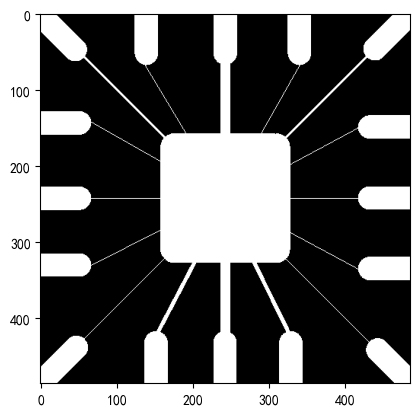

In [3]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\wirebond-mask.tif",0)
plt.imshow(img_ori,'gray')

#### 腐蚀与膨胀

(<Axes: title={'center': '3x3矩形结构元 腐蚀操作'}>,
 (-0.5, 485.5, 485.5, -0.5),
 Text(0.5, 1.0, '3x3矩形结构元 腐蚀操作'))

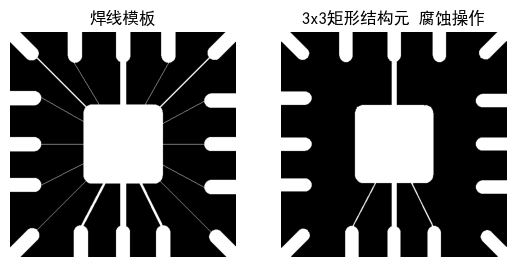

In [4]:
#腐蚀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) 
'''
形态学操作用于生成SE
函数原型:getStructuringElement(shape,ksize)
shape：代表形状类型
    cv2. MORPH_RECT：矩形结构元素，所有元素值都是1
    cv2. MORPH_CROSS：十字形结构元素，对角线元素值都是1
    cv2. MORPH_ELLIPSE：椭圆形结构元素
ksize：代表形状元素的大小
'''
erode_img = cv2.erode(img_ori,kernel)

plt.subplot(121),plt.imshow(img_ori,'gray'),plt.axis('off'),plt.title('焊线模板')
plt.subplot(122),plt.imshow(erode_img,'gray'),plt.axis('off'),plt.title('3x3矩形结构元 腐蚀操作')

(<Axes: title={'center': '3x3矩形结构元 膨胀操作'}>,
 (-0.5, 1018.5, 888.5, -0.5),
 Text(0.5, 1.0, '3x3矩形结构元 膨胀操作'))

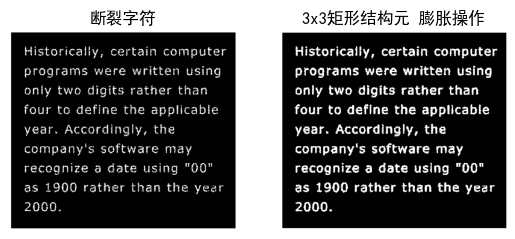

In [5]:
#膨胀
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\text-broken.tif",0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
dilate_img = cv2.dilate(img_ori,kernel)

plt.subplot(121),plt.imshow(img_ori,'gray'),plt.axis('off'),plt.title('断裂字符')
plt.subplot(122),plt.imshow(dilate_img,'gray'),plt.axis('off'),plt.title('3x3矩形结构元 膨胀操作')

#### 开运算与闭运算

In [6]:
'''开操作、闭操作'''
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\fingerprint-noisy.tif",0)
#plt.imshow(img_ori,'gray')

(<Axes: title={'center': '闭操作'}>,
 (-0.5, 314.5, 237.5, -0.5),
 Text(0.5, 1.0, '闭操作'))

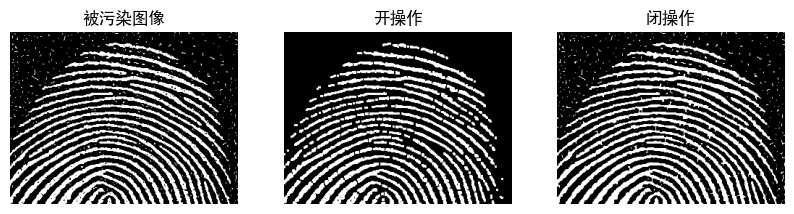

In [7]:
#开运算，先腐蚀后膨胀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))   #采用3x3矩形核

erode_img = cv2.erode(img_ori,kernel)
result1 = cv2.dilate(erode_img,kernel)

#闭运算，先膨胀后腐蚀
dilate_img = cv2.dilate(img_ori,kernel)
result2 = cv2.erode(dilate_img,kernel)

plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img_ori,'gray'),plt.axis('off'),plt.title('被污染图像')
plt.subplot(132),plt.imshow(result1,'gray'),plt.axis('off'),plt.title('开操作')
plt.subplot(133),plt.imshow(result2,'gray'),plt.axis('off'),plt.title('闭操作')

#### 边界提取

In [8]:
'''边界提取'''
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\lincoln.tif",0)

#SE
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) 
#腐蚀
img_erode = cv2.erode(img,kernel)

outline = img - img_erode


(<Axes: title={'center': '轮廓'}>,
 (-0.5, 220.5, 268.5, -0.5),
 Text(0.5, 1.0, '轮廓'))

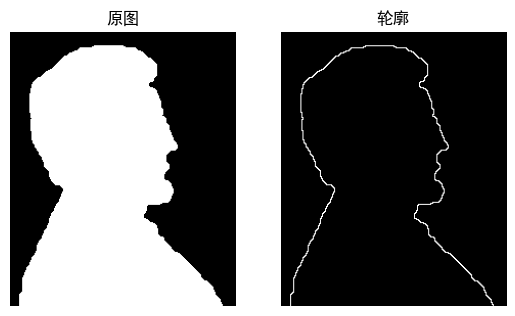

In [9]:
plt.figure()
plt.subplot(121),plt.imshow(img,'gray'),plt.axis('off'),plt.title('原图')
plt.subplot(122),plt.imshow(outline,'gray'),plt.axis('off'),plt.title('轮廓')

#### 孔洞填充

In [10]:
'''孔洞填充'''
img= cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\washers.tif",0)

def blank_fill(img,start_coordination):
    """
    img:待填充图像
    start_coordination:填充起点"""
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
    
    last_temp_img = np.zeros_like(img)    #定一个空白的且形状和原图相等的“黑”图（该图的所有像素值均为0）
    last_temp_img[start_coordination] = 1   #找出孔洞填充的起始点，并将该点标为1（即此时该图中仅有一个点的像素值为1，其余的点为0）
    current_temp_img = cv2.dilate(last_temp_img,kernel)  #膨胀
    while (current_temp_img != last_temp_img).any():     #一直迭代，直到Xk与Xk-1相同
        last_temp_img = current_temp_img    
        current_temp_img = cv2.dilate(current_temp_img,kernel)

        current_temp_img = np.logical_and(current_temp_img == 1,
                                          current_temp_img == (1 - img)).astype(float)  #膨胀结果与待填充图像的补集相交
     
    return current_temp_img

ret,img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)
img1 = 1 - img  #原图补集
bf = blank_fill(img,(55,54))
bf1 = blank_fill(img,(45,175))
bf2 = blank_fill(img,(140,460))
bf3 = blank_fill(img,(160,90))
bf4 = blank_fill(img,(45,360))
bf5 = blank_fill(img,(150,260))
bf = bf + bf1 +bf2+bf3+bf4+bf5
result = np.logical_or(bf,img)  #与原图进行 逻辑或 操作

(<Axes: title={'center': '孔洞填充'}>,
 Text(0.5, 1.0, '孔洞填充'))

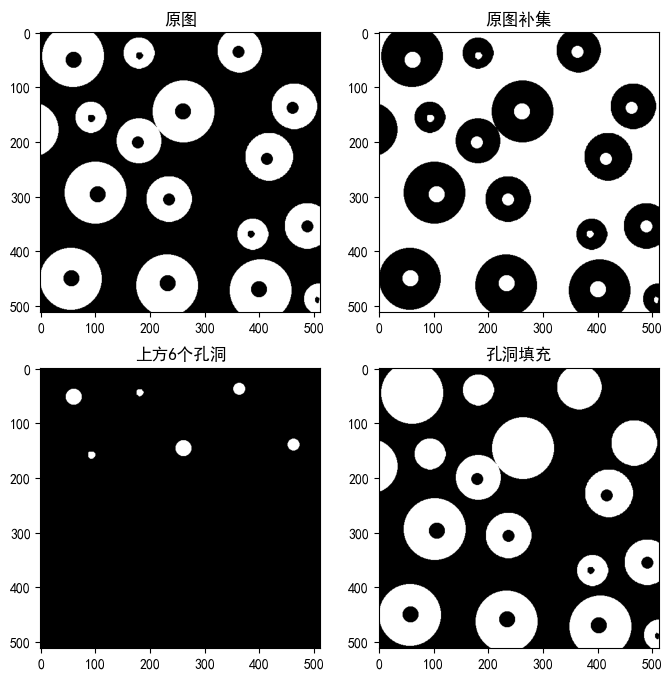

In [11]:
plt.figure(figsize=(8,8))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('原图')
plt.subplot(222),plt.imshow(img1,'gray'),plt.title('原图补集')
plt.subplot(223),plt.imshow(bf,'gray'),plt.title('上方6个孔洞')
plt.subplot(224),plt.imshow(result,'gray'),plt.title('孔洞填充')

#### 连通分量提取

In [12]:
'''连通分量提取'''
def connected_area(img,start_coodination):
    """提取连通分量"""
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    
    last_temp_img = np.zeros_like(img)       #定一个空白的且形状和原图相等的“黑”图（该图的所有像素值均为0）
    last_temp_img[start_coodination] = 1      #给定连通分量的起始点，并将该点标为1（即此时该图中仅有一个点的像素值为1，其余的点为0）
    current_temp_img = cv2.dilate(last_temp_img,kernel)
    
    while (current_temp_img != last_temp_img).any():    #一直迭代，直到Xk与Xk-1相同
        last_temp_img = current_temp_img    
        current_temp_img = cv2.dilate(current_temp_img,kernel)
        current_temp_img = np.logical_and((current_temp_img == img)
                                          ,current_temp_img == 1).astype(float) #膨胀结果与原图像交集
    
    return current_temp_img

In [13]:
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\chickenfilet-with-bones.tif",0)
print(img[100,350])
# cv2.threshold()
ret,binary = cv2.threshold(img,200,1, cv2.THRESH_BINARY)
#采用5*5的结构元提取出其中的一个连通分量
con = connected_area(binary,(250,350))

229


(<Axes: title={'center': '连通分量提取'}>,
 Text(0.5, 1.0, '连通分量提取'),
 (-0.5, 711.5, 320.5, -0.5))

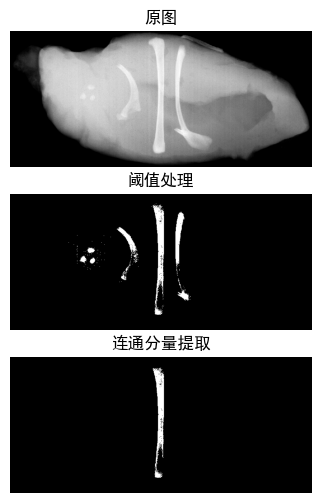

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(311),plt.imshow(img,'gray'),plt.title('原图'),plt.axis('off')
plt.subplot(312),plt.imshow(binary,'gray'),plt.title('阈值处理'),plt.axis('off')
plt.subplot(313),plt.imshow(con,'gray'),plt.title('连通分量提取'),plt.axis('off')

#### 骨架提取

(<Axes: title={'center': '骨架'}>,
 Text(0.5, 1.0, '骨架'),
 (-0.5, 453.5, 453.5, -0.5))

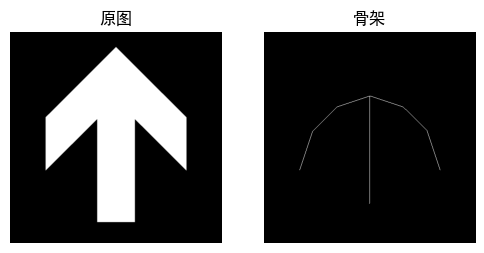

In [15]:
'''形态学骨架提取(Skimage库的morphology.skeletonize)'''
from skimage import morphology

img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\wingding-arrow-up.tif",0)
ret,binary = cv2.threshold(img,200,1, cv2.THRESH_BINARY)
#skimage库中的骨架提取算法
ske = morphology.skeletonize(img)

plt.figure(figsize=(6,6))
plt.subplot(121),plt.imshow(img,'gray'),plt.title('原图'),plt.axis('off')
plt.subplot(122),plt.imshow(ske,'gray'),plt.title('骨架'),plt.axis('off')

In [16]:
'''骨架提取(自写)'''
def skeleton_extraction(img):
    '''骨架抽取算法'''
    skeleton = np.zeros(img.shape,dtype=np.uint8)                # 将结果保留在这
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))  # 3*3 方形结构元
 
    while img.any():     # 循环迭代
 
        img_open = cv2.dilate(cv2.erode(img,kernel),kernel)       # 做开运算
        # img_open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)  #OpenCV 形态学开运算方法

        img_diff = img - img_open                                   # 原图 - 开运算图
        skeleton = np.logical_or(skeleton,img_diff)                 # 将结果并在一起
        img = cv2.erode(img,kernel)                                 # 腐蚀
 
    return skeleton

img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\letters-and-objects.tif",0)
ret,binary = cv2.threshold(img,200,1, cv2.THRESH_BINARY)
ske = skeleton_extraction(img)



(<Axes: title={'center': '骨架'}>,
 Text(0.5, 1.0, '骨架'),
 (-0.5, 756.5, 756.5, -0.5))

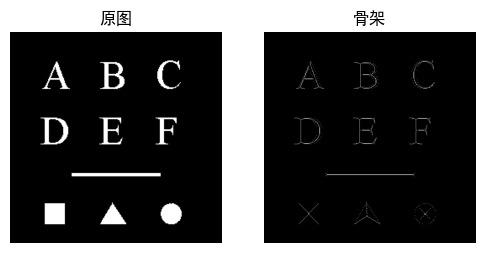

In [17]:
plt.figure(figsize=(6,6))
plt.subplot(121),plt.imshow(img,'gray'),plt.title('原图'),plt.axis('off')
plt.subplot(122),plt.imshow(ske,'gray'),plt.title('骨架'),plt.axis('off')


#### 重建开运算

In [18]:
'''重建开运算'''
def rebuild_open(model,kernel,erode_time = 1):
    '''重建开运算'''
    #多次腐蚀
    F = model.copy()
    for i in range(erode_time):
        F = cv2.erode(F,kernel)
    #测地膨胀
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    last = F.copy()
    while True:
        
        current = cv2.dilate(last,dilate_kernel)
        current = np.logical_and(current, model)
        current = current.astype(float)
        if(last == current).all():
            break
        else:
            last = current
    
    return current

model = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\text.tif",0)
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(1,51))
# print(kernel1)
F = cv2.erode(model,kernel1)

img_open = cv2.morphologyEx(model,cv2.MORPH_OPEN,kernel1)
re_op = rebuild_open(model,kernel1)


(<Axes: title={'center': '重建开运算'}>,
 Text(0.5, 1.0, '重建开运算'),
 (-0.5, 2017.5, 917.5, -0.5))

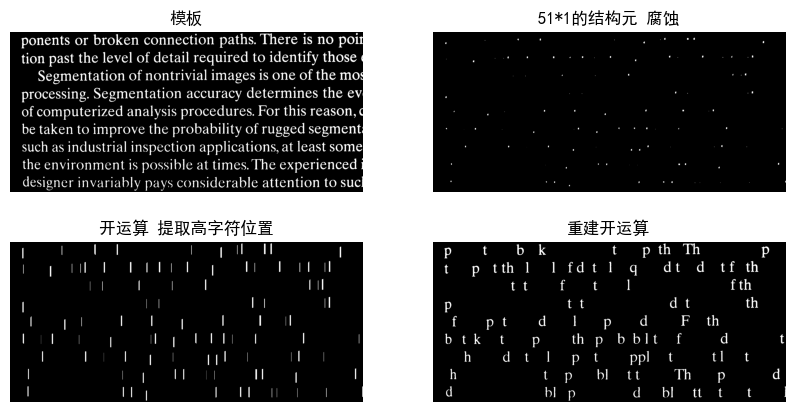

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(221),plt.imshow(model,'gray'),plt.title('模板'),plt.axis('off')
plt.subplot(222),plt.imshow(F,'gray'),plt.title('51*1的结构元 腐蚀'),plt.axis('off')
plt.subplot(223),plt.imshow(img_open,'gray'),plt.title('开运算 提取高字符位置'),plt.axis('off')
plt.subplot(224),plt.imshow(re_op,'gray'),plt.title('重建开运算'),plt.axis('off')

### 灰度级形态学

#### 灰度腐蚀和膨胀

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


(<Axes: title={'center': '5*5圆形结构元 膨胀'}>,
 Text(0.5, 1.0, '5*5圆形结构元 膨胀'),
 (-0.5, 947.5, 914.5, -0.5))

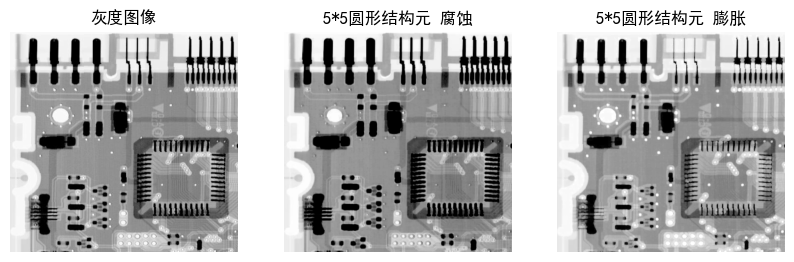

In [20]:
#灰度腐蚀与膨胀
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\circuitboard.tif",0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(kernel)

#灰度腐蚀
img_erode = cv2.erode(img,kernel)
#灰度膨胀
img_dilate = cv2.dilate(img,kernel)

#结果展示
plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img,'gray'),plt.title('灰度图像'),plt.axis('off')
plt.subplot(132),plt.imshow(img_erode,'gray'),plt.title('5*5圆形结构元 腐蚀'),plt.axis('off')
plt.subplot(133),plt.imshow(img_dilate,'gray'),plt.title('5*5圆形结构元 膨胀'),plt.axis('off')


#### 灰度开运算和闭运算

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


(<Axes: title={'center': '5*5圆形结构元 灰度闭运算'}>,
 Text(0.5, 1.0, '5*5圆形结构元 灰度闭运算'),
 (-0.5, 463.5, 447.5, -0.5))

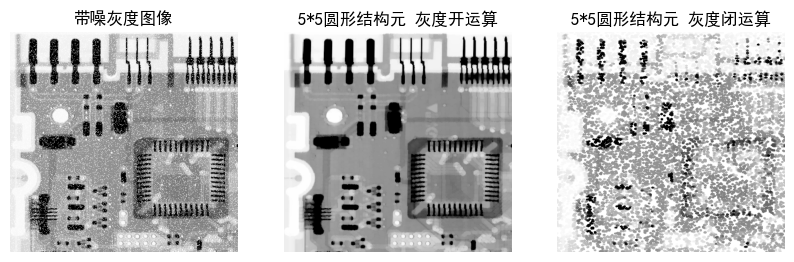

In [21]:
#灰度开运算和闭运算
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\circuitboard-salt.tif",0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(kernel)

#灰度开运算
img_open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
#灰度闭运算
img_close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

#结果展示
plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img,'gray'),plt.title('带噪灰度图像'),plt.axis('off')
plt.subplot(132),plt.imshow(img_open,'gray'),plt.title('5*5圆形结构元 灰度开运算'),plt.axis('off')
plt.subplot(133),plt.imshow(img_close,'gray'),plt.title('5*5圆形结构元 灰度闭运算'),plt.axis('off')

#### 形态学梯度

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


(<Axes: title={'center': '形态学梯度'}>,
 Text(0.5, 1.0, '形态学梯度'),
 (-0.5, 569.5, 599.5, -0.5))

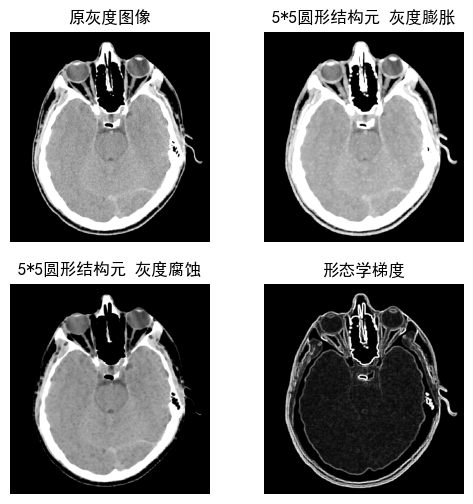

In [22]:
#形态学梯度 = 膨胀 - 腐蚀
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\headCT.tif",0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))  #5*5椭圆形结构元
print(kernel)

#灰度腐蚀
img_erode = cv2.erode(img,kernel)
#灰度膨胀
img_dilate = cv2.dilate(img,kernel)

gradient = img_dilate - img_erode

#结果展示
plt.figure(figsize=(6,6))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('原灰度图像'),plt.axis('off')
plt.subplot(222),plt.imshow(img_dilate,'gray'),plt.title('5*5圆形结构元 灰度膨胀'),plt.axis('off')
plt.subplot(223),plt.imshow(img_erode,'gray'),plt.title('5*5圆形结构元 灰度腐蚀'),plt.axis('off')
plt.subplot(224),plt.imshow(gradient,'gray'),plt.title('形态学梯度'),plt.axis('off')

#### 顶帽变换和底帽变换

In [23]:
#图像相减结合开运算和闭运算，可以得到顶帽和底帽变换
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\rice.tif",0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(81,81))
#对原图像进行阈值处理
ret, img_thre1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
'''顶帽变换'''
#原图 - 开运算
img_open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
tophat = img - img_open

#对阴影校正后的图像进行阈值处理
#对原图像进行阈值处理
ret, img_thre2 = cv2.threshold(tophat,80,255,cv2.THRESH_BINARY)

'''底帽变换'''
#闭运算 - 原图
# img_close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
# bottomhat = img_close - img

'底帽变换'

(<Axes: title={'center': '顶帽变换后阈值处理'}>,
 Text(0.5, 1.0, '顶帽变换后阈值处理'),
 (-0.5, 599.5, 599.5, -0.5))

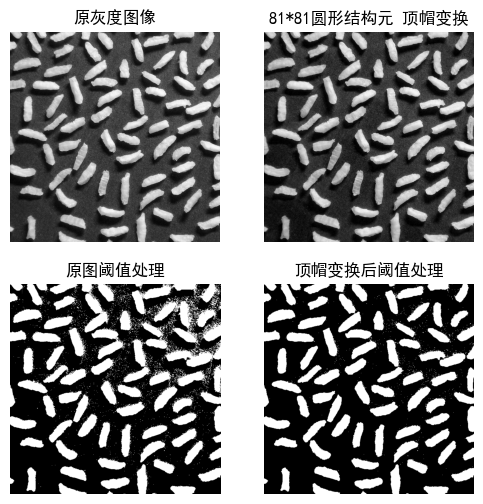

In [24]:
#结果展示
plt.figure(figsize=(6,6))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('原灰度图像'),plt.axis('off')
plt.subplot(222),plt.imshow(tophat,'gray'),plt.title('81*81圆形结构元 顶帽变换'),plt.axis('off')
plt.subplot(223),plt.imshow(img_thre1,'gray'),plt.title('原图阈值处理'),plt.axis('off')
plt.subplot(224),plt.imshow(img_thre2,'gray'),plt.title('顶帽变换后阈值处理'),plt.axis('off')

#### 纹理分割

In [25]:
'''纹理分割'''
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\blobs.tif",0)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(51,51))
#用半径大于小斑点的结构元对原图闭运算，以消除小斑点
img_close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel1)
#开运算删除大斑点的间距
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(91,91))
img_open = cv2.morphologyEx(img_close,cv2.MORPH_OPEN,kernel2)
#边界提取(利用形态学梯度)
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
img_erode = cv2.erode(img_open,kernel3)
img_dilate = cv2.dilate(img_open,kernel3)
outline = img_dilate - img_erode

divided = outline + img

(<Axes: title={'center': '加入边界'}>,
 Text(0.5, 1.0, '加入边界'),
 (-0.5, 599.5, 599.5, -0.5))

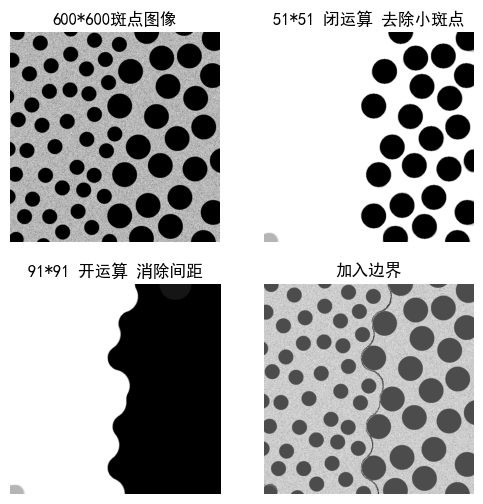

In [26]:
#结果展示
plt.figure(figsize=(6,6))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('600*600斑点图像'),plt.axis('off')
plt.subplot(222),plt.imshow(img_close,'gray'),plt.title('51*51 闭运算 去除小斑点'),plt.axis('off')
plt.subplot(223),plt.imshow(img_open,'gray'),plt.title('91*91 开运算 消除间距'),plt.axis('off')
plt.subplot(224),plt.imshow(divided,'gray'),plt.title('加入边界'),plt.axis('off')

#### 灰度形态学重建

In [27]:
#逐点最小算子
def cal_min(a , b):
    c = a.copy()
    c = np.where(a>=b,b,a)
    return c
#逐点最大算子
def cal_max(a , b):
    c = a.copy()
    c = np.where(a<=b,b,a)
    return c

#灰度级重建开运算
def gray_rebuild_open(model,kernel,erode_time = 1):
    '''重建开运算'''
    #多次腐蚀
    F = model.copy()
    for i in range(erode_time):
        F = cv2.erode(F,kernel)
    #测地膨胀
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    last = F.copy()
    while True:
        
        current = cv2.dilate(last,dilate_kernel)
        current = cal_min(current, model)   #逐点最小
        # current = current.astype(float)
        if(last == current).all():
            break
        else:
            last = current
    
    return current

#灰度级重建闭运算
def gray_rebuild_close(model,kernel,erode_time = 1):
    '''重建闭运算'''
    #多次膨胀
    F = model.copy()
    for i in range(erode_time):
        F = cv2.dilate(F,kernel)
    #测地腐蚀
    erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    last = F.copy()
    while True:
        
        current = cv2.erode(last,erode_kernel)
        current = cal_max(current, model)   #逐点最大
        # current = current.astype(float)
        if(last == current).all():
            break
        else:
            last = current
    
    return current

In [28]:
img = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\calculator.tif")

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(71,1))
#灰度级重建
img_rb = gray_rebuild_open(img,kernel1)
# 1*71 开运算
img_open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel1)
#顶帽变换
tophat = img - img_open
#重建顶帽运算 = 原图 - 重建开运算
rebuild_tophat = img - img_rb

#用11*1的水平线对重建顶帽运算图 进行重建开运算
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(11,1))
img_rt_rb = gray_rebuild_open(rebuild_tophat,kernel2)

#用长21的水平线对图f进行膨胀
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(21,1))
img_dilate = cv2.dilate(img_rt_rb,kernel3)

#图d和图g最小值运算
result1 = cal_min(rebuild_tophat,img_dilate)

#最终重建结果,将图h作为标记，膨胀后的图像作为模板再进行一次重建
kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
model = cv2.dilate(result1,kernel4)
result2 = gray_rebuild_open(model,kernel4)

(<Axes: title={'center': '(i)最后的重建结果'}>,
 Text(0.5, 1.0, '(i)最后的重建结果'),
 (-0.5, 1359.5, 1133.5, -0.5))

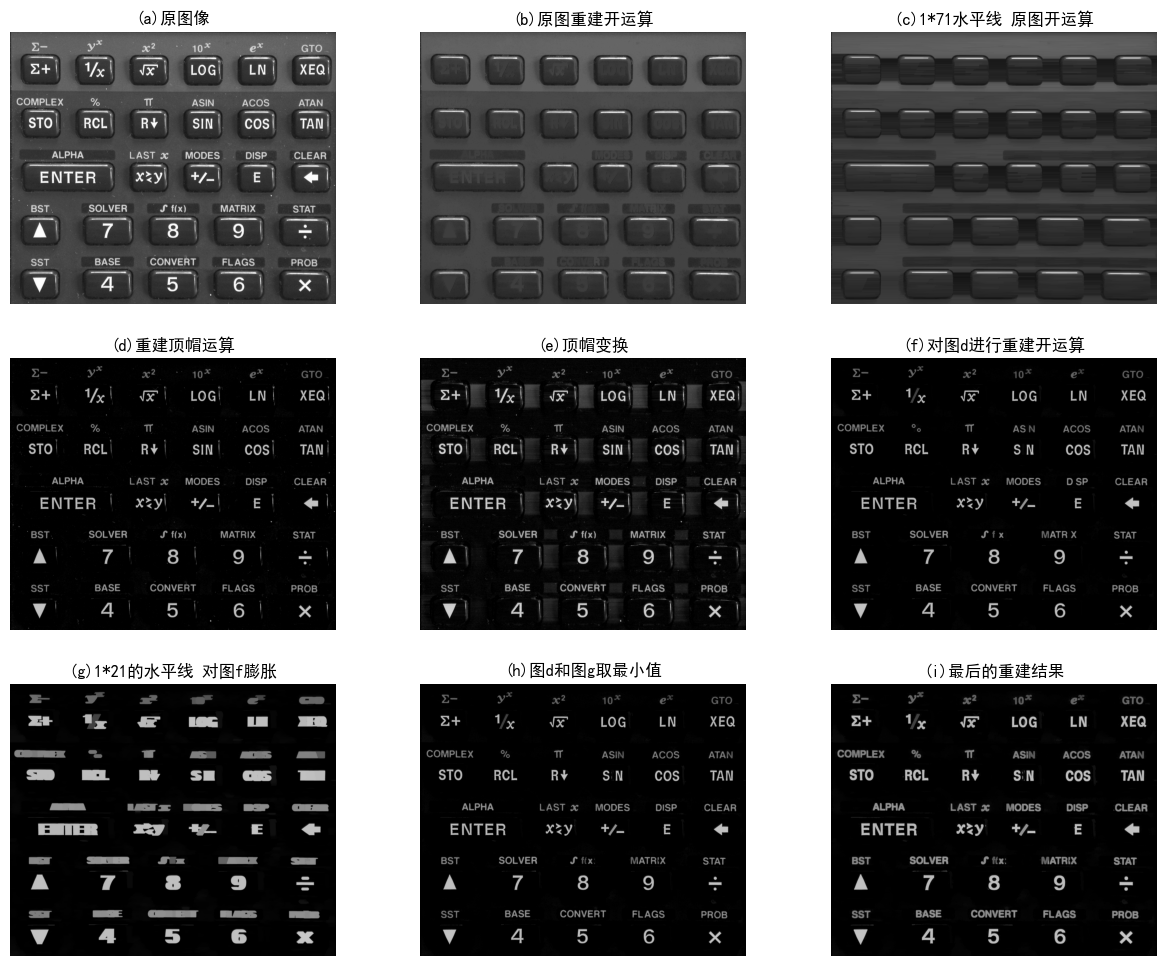

In [29]:
#结果展示
plt.figure(figsize=(15,12))
plt.subplot(331),plt.imshow(img,'gray'),plt.title('(a)原图像'),plt.axis('off')
plt.subplot(332),plt.imshow(img_rb,'gray'),plt.title('(b)原图重建开运算'),plt.axis('off')
plt.subplot(333),plt.imshow(img_open,'gray'),plt.title('(c)1*71水平线 原图开运算'),plt.axis('off')
plt.subplot(334),plt.imshow(rebuild_tophat,'gray'),plt.title('(d)重建顶帽运算'),plt.axis('off')
plt.subplot(335),plt.imshow(tophat,'gray'),plt.title('(e)顶帽变换'),plt.axis('off')
plt.subplot(336),plt.imshow(img_rt_rb,'gray'),plt.title('(f)对图d进行重建开运算'),plt.axis('off')
plt.subplot(337),plt.imshow(img_dilate,'gray'),plt.title('(g)1*21的水平线 对图f膨胀'),plt.axis('off')
plt.subplot(338),plt.imshow(result1,'gray'),plt.title('(h)图d和图g取最小值'),plt.axis('off')
plt.subplot(339),plt.imshow(result2,'gray'),plt.title('(i)最后的重建结果'),plt.axis('off')